In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import plotly.graph_objects as go
import statsmodels.api as sm
import math
import plotly.express as px
import random

In [50]:
df_netflix= pd.read_csv('/content/drive/MyDrive/netflix_titles.csv', usecols=['show_id','title','director','cast','listed_in','description'])
df_titles= pd.read_csv('/content/drive/MyDrive/titles.csv', usecols=['id','title','type','genres','imdb_votes','imdb_score','tmdb_popularity','tmdb_score'])
df_credits= pd.read_csv('/content/drive/MyDrive/credits.csv')

In [51]:
merged_df = pd.merge(df_titles, df_credits, on='id', how='inner')

In [52]:
remerged_df = pd.merge(merged_df, df_netflix, on='title', how='inner')

In [53]:
remerged_df

,id,title,type,genres,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,show_id,director,cast,listed_in,description
0,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
1,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
2,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
3,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
4,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51355,tm959213,My Amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,290877,Alexander Medina,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...
51356,tm959213,My Amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,178998,Helga Krapf,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...
51357,tm959213,My Amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,283530,Joyce Ann Burton,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...
51358,tm959213,My Amanda,MOVIE,"['drama', 'romance']",5.7,308.0,2.908,5.700,134350,Jess Mendoza,NaN,ACTOR,s459,Alessandra de Rossi,"Piolo Pascual, Alessandra de Rossi, KC Montero...","Dramas, International Movies, Romantic Movies",Two unusually close friends share every aspect...


In [54]:
remerged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51360 entries, 0 to 51359
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               51360 non-null  object 
 1   title            51360 non-null  object 
 2   type             51360 non-null  object 
 3   genres           51360 non-null  object 
 4   imdb_score       48700 non-null  float64
 5   imdb_votes       48656 non-null  float64
 6   tmdb_popularity  51360 non-null  float64
 7   tmdb_score       50653 non-null  float64
 8   person_id        51360 non-null  int64  
 9   name             51360 non-null  object 
 10  character        44883 non-null  object 
 11  role             51360 non-null  object 
 12  show_id          51360 non-null  object 
 13  director         40923 non-null  object 
 14  cast             49277 non-null  object 
 15  listed_in        51360 non-null  object 
 16  description      51360 non-null  object 
dtypes: float64(4

In [55]:
remerged_df.describe()

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,48700.000000,4.865600e+04,51360.000000,50653.000000,5.136000e+04
mean,6.453396,5.235322e+04,21.295817,6.698076,5.157104e+05
std,1.119886,1.610226e+05,57.361973,1.027974,6.143682e+05
min,1.500000,5.000000e+00,0.600000,1.000000,7.000000e+00
25%,5.800000,1.557000e+03,4.851000,6.000000,4.856000e+04
50%,6.500000,6.250000e+03,10.442000,6.700000,2.047260e+05
75%,7.200000,3.131200e+04,21.048000,7.400000,8.728400e+05
max,9.500000,2.294231e+06,2226.231000,10.000000,2.460188e+06


In [59]:
remerged_df.columns = remerged_df.columns.str.title()

In [60]:
print(remerged_df.isnull().sum())

Id                     0
Title                  0
Type                   0
Genres                 0
Imdb_Score          2660
Imdb_Votes          2704
Tmdb_Popularity        0
Tmdb_Score           707
Person_Id              0
Name                   0
Character           6477
Role                   0
Show_Id                0
Director           10437
Cast                2083
Listed_In              0
Description            0
dtype: int64


In [61]:
remerged_df['Imdb_Score'].fillna(remerged_df['Imdb_Score'].mean(), inplace=True)

remerged_df['Imdb_Votes'].fillna(remerged_df['Imdb_Votes'].median(), inplace=True)

remerged_df['Tmdb_Score'].fillna(remerged_df['Tmdb_Score'].mean(), inplace=True)

remerged_df['Director'].fillna('Unknown', inplace=True)

remerged_df['Character'].fillna('Unknown', inplace=True)

most_common_cast = remerged_df['Cast'].mode()[0]
remerged_df['Cast'].fillna(most_common_cast, inplace=True)

In [62]:
print(remerged_df.isnull().sum())

Id                 0
Title              0
Type               0
Genres             0
Imdb_Score         0
Imdb_Votes         0
Tmdb_Popularity    0
Tmdb_Score         0
Person_Id          0
Name               0
Character          0
Role               0
Show_Id            0
Director           0
Cast               0
Listed_In          0
Description        0
dtype: int64


In [36]:
duplicate_rows = remerged_df.duplicated().sum()

print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


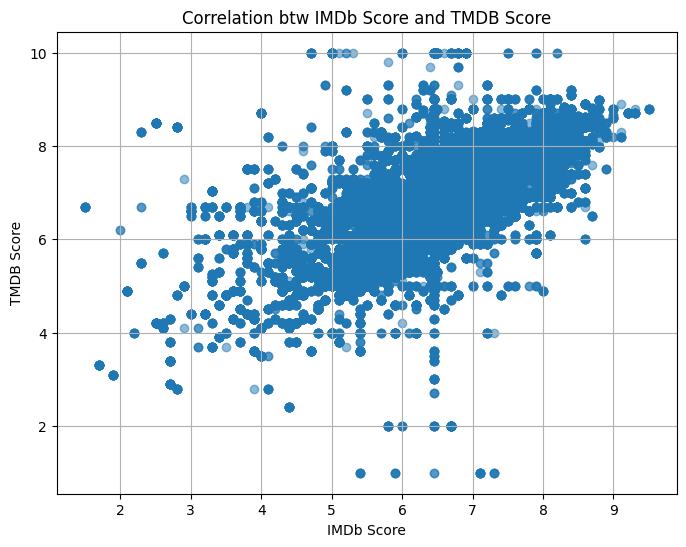

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(remerged_df['Imdb_Score'], remerged_df['Tmdb_Score'], alpha=0.5)
plt.title('Correlation btw IMDb Score and TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.grid(True)
plt.show()

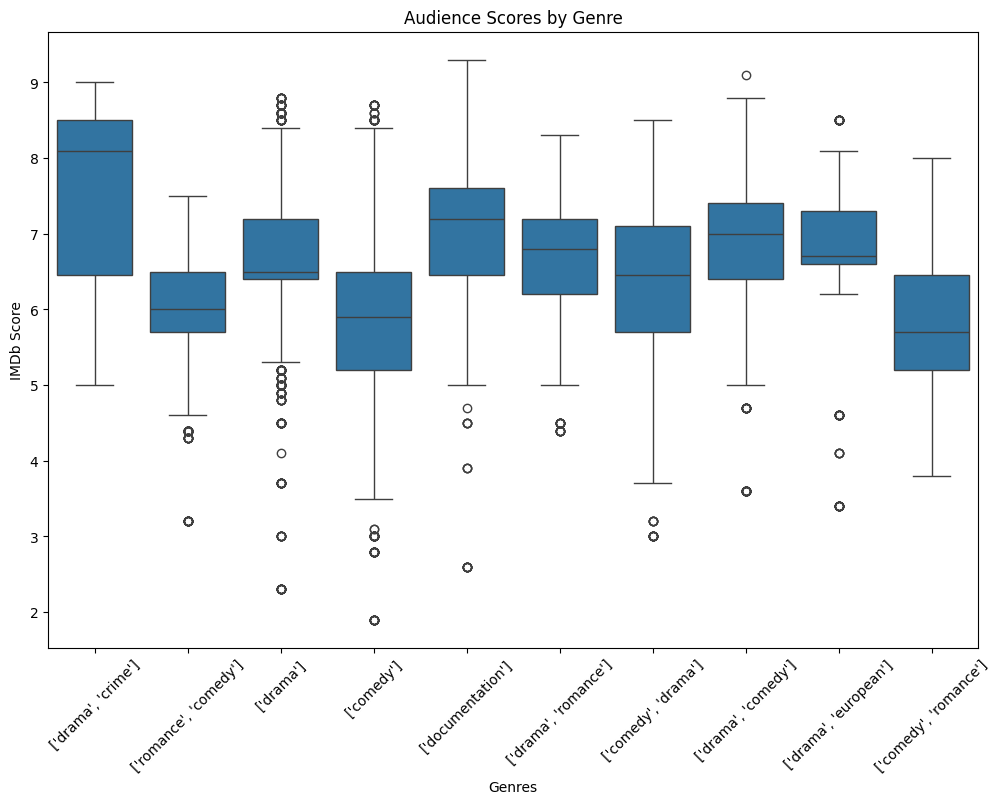

In [28]:
top_genres = remerged_df['Genres'].value_counts().head(10).index

filtered_df = remerged_df[remerged_df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres', y='Imdb_Score', data=filtered_df)
plt.title('Audience Scores by Genre')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()

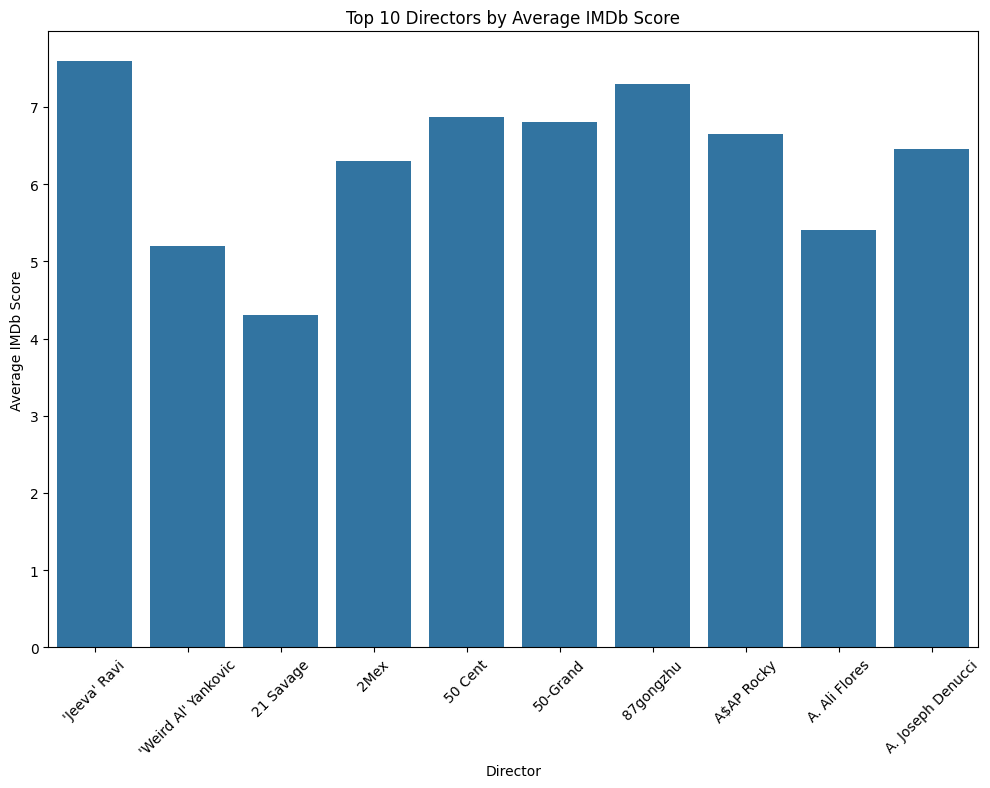

In [31]:
director_avg_imdb_scores = remerged_df.groupby('Name')['Imdb_Score'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='Imdb_Score', data=director_avg_imdb_scores.head(10))
plt.title('Top 10 Directors by Average IMDb Score')
plt.xlabel('Director')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()